In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [3]:
import matplotlib.pyplot as plt 
from bpd.io import load_dataset

In [4]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp40_42/interim_samples_42.npz")

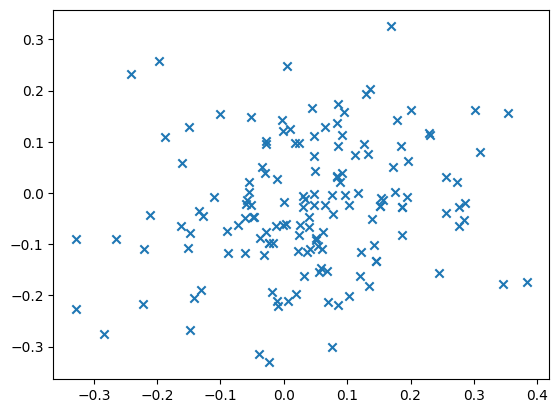

In [9]:
e_post = ds['e_post']
for ii in range(1):
    plt.scatter(e_post[ii, :150, 0], e_post[ii, :150, 1], marker='x')